In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('../scikit-learning data/data_car.csv')
data.columns = data.columns.str.lower().str.replace(' ', '_')
columns = list(data.dtypes[data.dtypes == 'object'].index)
for col in columns:
    data[col] = data[col].str.lower().str.replace(' ', '_')
data = data.fillna(0)

In [3]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [4]:
features = ['make','engine_fuel_type','engine_hp','transmission_type','driven_wheels','number_of_doors','vehicle_style','highway_mpg','city_mpg','popularity']
#data = data[features]

In [5]:
df_train_full ,df_test =train_test_split(data,test_size=0.2,random_state=123)
df_train,df_val = train_test_split(df_train_full,test_size=0.2,random_state=123)

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values) 

del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [6]:
df_train_dict = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse = False)
dv.fit(df_train_dict)
X_train =dv.transform(df_train_dict)
dv.get_feature_names_out()

array(['city_mpg', 'driven_wheels=all_wheel_drive',
       'driven_wheels=four_wheel_drive',
       'driven_wheels=front_wheel_drive',
       'driven_wheels=rear_wheel_drive', 'engine_fuel_type',
       'engine_fuel_type=diesel', 'engine_fuel_type=electric',
       'engine_fuel_type=flex-fuel_(premium_unleaded_recommended/e85)',
       'engine_fuel_type=flex-fuel_(premium_unleaded_required/e85)',
       'engine_fuel_type=flex-fuel_(unleaded/e85)',
       'engine_fuel_type=flex-fuel_(unleaded/natural_gas)',
       'engine_fuel_type=natural_gas',
       'engine_fuel_type=premium_unleaded_(recommended)',
       'engine_fuel_type=premium_unleaded_(required)',
       'engine_fuel_type=regular_unleaded', 'engine_hp', 'highway_mpg',
       'make=acura', 'make=alfa_romeo', 'make=aston_martin', 'make=audi',
       'make=bentley', 'make=bmw', 'make=bugatti', 'make=buick',
       'make=cadillac', 'make=chevrolet', 'make=chrysler', 'make=dodge',
       'make=ferrari', 'make=fiat', 'make=ford', 'ma

0.3330721067996182


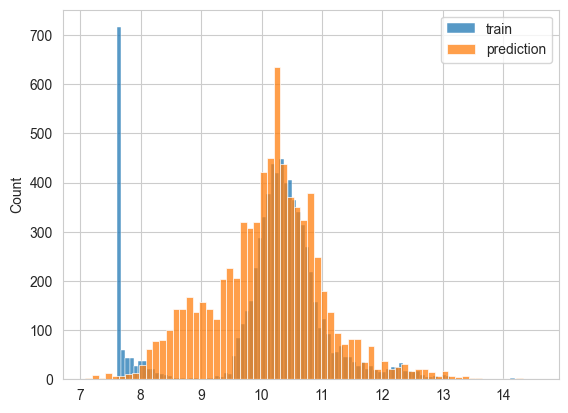

In [7]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_train)
rmse = mean_squared_error(y_train,y_pred)
print(rmse)
sns.histplot(y_train,label='train')
sns.histplot(y_pred,label='prediction')
plt.legend()

In [8]:
df_val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(df_val_dict)

0.33365572742429217


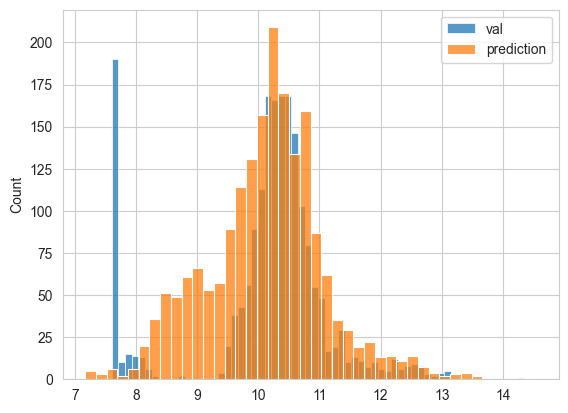

In [9]:
y_pred = ridge.predict(X_val)
rmse = mean_squared_error(y_val,y_pred)
print(rmse)
sns.histplot(y_val,label='val')
sns.histplot(y_pred,label='prediction')
plt.legend()